In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


In [2]:
# 그래프 작성에 필요한 패키지 임포트
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
# 시뮬레이션 데이터 세트와 결정 경계 도식화 함수 임포트
from utils import load_dataset, plot_decision_boundary

In [4]:
import sklearn
def load_dataset():
    np.random.seed(31) 
    return sklearn.datasets.make_circles(400, noise=0.15, factor=0.2)

In [5]:
X, Y = load_dataset()
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}, X.shape[0]: {X.shape[0]}")

X.shape: (400, 2), Y.shape: (400,), X.shape[0]: 400


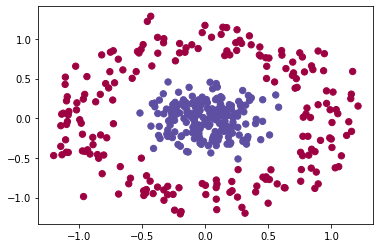

In [6]:
# 데이터 세트를 도식화
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [7]:
# 케라스 순차 모델로 논리 회귀 모델 구성
model = Sequential()

model.add(Dense(1, activation='sigmoid', input_dim=X.shape[1]))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(X, Y, batch_size=5, epochs=100, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





400/400 [==============================] - 1s 2ms/step - loss: 0.7438
Epoch 2/100
400/400 [==============================] - 0s 326us/step - loss: 0.7391
Epoch 3/100
400/400 [==============================] - 0s 559us/step - loss: 0.7347
Epoch 4/100
400/400 [==============================] - 0s 796us/step - loss: 0.7308
Epoch 5/100
400/400 [==============================] - 0s 820us/step - loss: 0.7271
Epoch 6/100
400/400 [==============================] - 0s 829us/step - loss: 0.7239
Epoch 7/100
400/400 [==============================] - 0s 828us/step - loss: 0.7209
Epoch 8/100
400/400 [==============================] - 0s 825us/step - loss: 0.7181
Epoch 9/100
400/400 [==============================] - 0s 820us/step - loss: 0.7158
Epoch 10/100
400/400 [==============================] - 0s 827us/step - loss: 0.7134
Epoch 11/100
400/400 [==============================] - 0

400/400 [==============================] - 0s 748us/step - loss: 0.6934
Epoch 71/100
400/400 [==============================] - 0s 743us/step - loss: 0.6934
Epoch 72/100
400/400 [==============================] - 0s 749us/step - loss: 0.6933
Epoch 73/100
400/400 [==============================] - 0s 751us/step - loss: 0.6934
Epoch 74/100
400/400 [==============================] - 0s 742us/step - loss: 0.6934
Epoch 75/100
400/400 [==============================] - 0s 750us/step - loss: 0.6934
Epoch 76/100
400/400 [==============================] - 0s 753us/step - loss: 0.6935
Epoch 77/100
400/400 [==============================] - 0s 762us/step - loss: 0.6934
Epoch 78/100
400/400 [==============================] - 0s 620us/step - loss: 0.6934
Epoch 79/100
400/400 [==============================] - 0s 758us/step - loss: 0.6934
Epoch 80/100
400/400 [==============================] - 0s 751us/step - loss: 0.6933
Epoch 81/100
400/400 [==============================] - 0s 752us/step - loss: 

In [12]:
import matplotlib.patches as mpatches
def plot_decision_boundary(pred_func, X, Y): 
    # create a mesh of possible values for X1 and X2
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h)) 
    # predict output for all the values in the mesh
    Y_hat = pred_func(np.c_[X1.ravel(), X2.ravel()]) 
    Y_hat = Y_hat.reshape(X1.shape) 
    Y_hat = Y_hat.round(decimals=0)
    # plot predicted values
    plt.contourf(X1, X2, Y_hat, cmap=plt.cm.Spectral) 
    # plot points in the training dataset
    reds = Y == 0
    blues = Y == 1
    class_1=plt.scatter(X[reds, 0], X[reds, 1], c="red", s=40, edgecolor='k')
    class_2=plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=40, edgecolor='k')
    # add legend 
    plt.legend((class_1, class_2, mpatches.Patch(color="red"), mpatches.Patch(color="blue")),('No Purchase','Purchase',"No Purchase Class predicted region", "Purchase Class predicted region")) 
    plt.xlabel('Age')
    plt.ylabel('Salary')

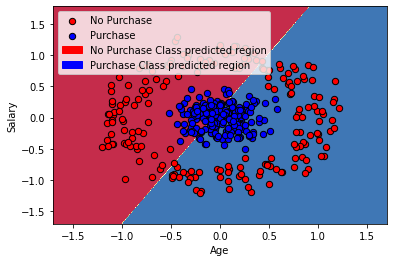

In [13]:
plot_decision_boundary(lambda x: model.predict(x), X, Y)

In [14]:
model2 = Sequential()

model2.add(Dense(3, activation='relu', input_dim=X.shape[1]))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(optimizer='sgd', loss='binary_crossentropy')
model2.fit(X, Y, batch_size=5, epochs=200, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
400/400 [==============================] - 0s 488us/step - loss: 0.6143
Epoch 2/200
400/400 [==============================] - 0s 273us/step - loss: 0.6054
Epoch 3/200
400/400 [==============================] - 0s 666us/step - loss: 0.5983
Epoch 4/200
400/400 [==============================] - 0s 634us/step - loss: 0.5919
Epoch 5/200
400/400 [==============================] - 0s 860us/step - loss: 0.5854
Epoch 6/200
400/400 [==============================] - 0s 1ms/step - loss: 0.5791
Epoch 7/200
400/40

400/400 [==============================] - 0s 821us/step - loss: 0.1337
Epoch 91/200
400/400 [==============================] - 0s 828us/step - loss: 0.1319
Epoch 92/200
400/400 [==============================] - 0s 827us/step - loss: 0.1302
Epoch 93/200
400/400 [==============================] - 0s 821us/step - loss: 0.1285
Epoch 94/200
400/400 [==============================] - 0s 821us/step - loss: 0.1269
Epoch 95/200
400/400 [==============================] - 0s 826us/step - loss: 0.1254
Epoch 96/200
400/400 [==============================] - 0s 823us/step - loss: 0.1239
Epoch 97/200
400/400 [==============================] - 0s 818us/step - loss: 0.1223
Epoch 98/200
400/400 [==============================] - 0s 828us/step - loss: 0.1209
Epoch 99/200
400/400 [==============================] - 0s 817us/step - loss: 0.1195
Epoch 100/200
400/400 [==============================] - 0s 813us/step - loss: 0.1182
Epoch 101/200
400/400 [==============================] - 0s 832us/step - loss

400/400 [==============================] - 0s 827us/step - loss: 0.0636
Epoch 186/200
400/400 [==============================] - 0s 825us/step - loss: 0.0633
Epoch 187/200
400/400 [==============================] - 0s 813us/step - loss: 0.0630
Epoch 188/200
400/400 [==============================] - 0s 822us/step - loss: 0.0627
Epoch 189/200
400/400 [==============================] - 0s 816us/step - loss: 0.0624
Epoch 190/200
400/400 [==============================] - 0s 825us/step - loss: 0.0622
Epoch 191/200
400/400 [==============================] - 0s 826us/step - loss: 0.0619
Epoch 192/200
400/400 [==============================] - 0s 824us/step - loss: 0.0616
Epoch 193/200
400/400 [==============================] - 0s 836us/step - loss: 0.0613
Epoch 194/200
400/400 [==============================] - 0s 827us/step - loss: 0.0610
Epoch 195/200
400/400 [==============================] - 0s 822us/step - loss: 0.0607
Epoch 196/200
400/400 [==============================] - 0s 818us/st

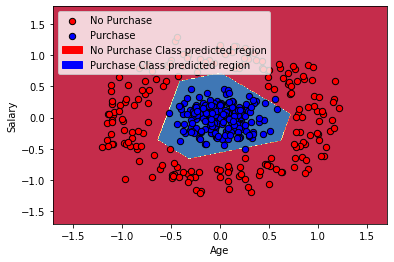

In [15]:
plot_decision_boundary(lambda x: model2.predict(x), X, Y)

In [16]:
model3 = Sequential()

model3.add(Dense(6, activation='relu', input_dim=X.shape[1]))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()
model3.compile(optimizer='sgd', loss='binary_crossentropy')
model3.fit(X, Y, batch_size=5, epochs=400, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
400/400 [==============================] - 0s 527us/step - loss: 0.7969
Epoch 2/400
400/400 [==============================] - 0s 489us/step - loss: 0.7714
Epoch 3/400
400/400 [==============================] - 0s 1ms/step - loss: 0.7501
Epoch 4/400
400/400 [==============================] - 0s 1ms/step - loss: 0.7311
Epoch 5/400
400/400 [==============================] - 0s 1ms/step - loss: 0.7148
Epoch 6/400
400/400 [==============================] - 0s 776us/step - loss: 0.7013
Epoch 7/400
400/400 [=

400/400 [==============================] - 0s 237us/step - loss: 0.3731
Epoch 91/400
400/400 [==============================] - 0s 349us/step - loss: 0.3704
Epoch 92/400
400/400 [==============================] - 0s 510us/step - loss: 0.3678
Epoch 93/400
400/400 [==============================] - 0s 637us/step - loss: 0.3651
Epoch 94/400
400/400 [==============================] - 0s 631us/step - loss: 0.3626
Epoch 95/400
400/400 [==============================] - 0s 742us/step - loss: 0.3597
Epoch 96/400
400/400 [==============================] - 0s 824us/step - loss: 0.3567
Epoch 97/400
400/400 [==============================] - 0s 819us/step - loss: 0.3537
Epoch 98/400
400/400 [==============================] - 0s 819us/step - loss: 0.3508
Epoch 99/400
400/400 [==============================] - 0s 822us/step - loss: 0.3476
Epoch 100/400
400/400 [==============================] - 0s 818us/step - loss: 0.3443
Epoch 101/400
400/400 [==============================] - 0s 823us/step - loss

400/400 [==============================] - 0s 820us/step - loss: 0.0957
Epoch 186/400
400/400 [==============================] - 0s 816us/step - loss: 0.0949
Epoch 187/400
400/400 [==============================] - 0s 818us/step - loss: 0.0941
Epoch 188/400
400/400 [==============================] - 0s 825us/step - loss: 0.0934
Epoch 189/400
400/400 [==============================] - 0s 810us/step - loss: 0.0926
Epoch 190/400
400/400 [==============================] - 0s 834us/step - loss: 0.0919
Epoch 191/400
400/400 [==============================] - 0s 825us/step - loss: 0.0912
Epoch 192/400
400/400 [==============================] - 0s 822us/step - loss: 0.0904
Epoch 193/400
400/400 [==============================] - 0s 823us/step - loss: 0.0898
Epoch 194/400
400/400 [==============================] - 0s 821us/step - loss: 0.0890
Epoch 195/400
400/400 [==============================] - 0s 823us/step - loss: 0.0884
Epoch 196/400
400/400 [==============================] - 0s 824us/st

400/400 [==============================] - 0s 817us/step - loss: 0.0568
Epoch 281/400
400/400 [==============================] - 0s 816us/step - loss: 0.0566
Epoch 282/400
400/400 [==============================] - 0s 821us/step - loss: 0.0564
Epoch 283/400
400/400 [==============================] - 0s 814us/step - loss: 0.0562
Epoch 284/400
400/400 [==============================] - 0s 660us/step - loss: 0.0560
Epoch 285/400
400/400 [==============================] - 0s 815us/step - loss: 0.0558
Epoch 286/400
400/400 [==============================] - 0s 822us/step - loss: 0.0556
Epoch 287/400
400/400 [==============================] - 0s 821us/step - loss: 0.0554
Epoch 288/400
400/400 [==============================] - 0s 828us/step - loss: 0.0552
Epoch 289/400
400/400 [==============================] - 0s 815us/step - loss: 0.0550
Epoch 290/400
400/400 [==============================] - 0s 828us/step - loss: 0.0548
Epoch 291/400
400/400 [==============================] - 0s 818us/st

400/400 [==============================] - 0s 822us/step - loss: 0.0435
Epoch 376/400
400/400 [==============================] - 0s 818us/step - loss: 0.0434
Epoch 377/400
400/400 [==============================] - 0s 816us/step - loss: 0.0434
Epoch 378/400
400/400 [==============================] - 0s 824us/step - loss: 0.0433
Epoch 379/400
400/400 [==============================] - 0s 823us/step - loss: 0.0431
Epoch 380/400
400/400 [==============================] - 0s 822us/step - loss: 0.0431
Epoch 381/400
400/400 [==============================] - 0s 824us/step - loss: 0.0430
Epoch 382/400
400/400 [==============================] - 0s 743us/step - loss: 0.0429
Epoch 383/400
400/400 [==============================] - 0s 811us/step - loss: 0.0428
Epoch 384/400
400/400 [==============================] - 0s 809us/step - loss: 0.0427
Epoch 385/400
400/400 [==============================] - 0s 820us/step - loss: 0.0426
Epoch 386/400
400/400 [==============================] - 0s 817us/st

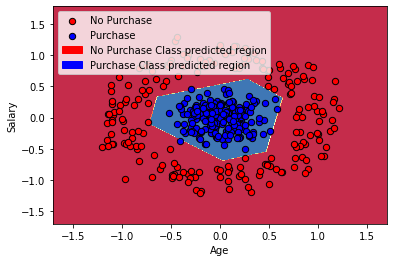

In [17]:
plot_decision_boundary(lambda x: model3.predict(x), X, Y)